In [5]:
import json
import os
import csv
import pandas as pd


In [6]:
def transform_participant_data(participant_data):
    camel_scores = [0] * 5
    camel_times = [0] * 5
    kebab_scores = [0] * 5
    kebab_times = [0] * 5

    # Load questionData dictionary
    question_data_dict = participant_data["questionData"]

    for _, question_data in question_data_dict.items():
        case_format = question_data["caseFormat"]
        is_correct = 1 if question_data["isCorrect"] else 0
        time_taken = question_data["timeTaken"]

        if case_format.startswith("camel"):
            camel_scores[int(case_format[-1]) - 1] = is_correct
            camel_times[int(case_format[-1]) - 1] = time_taken
        elif case_format.startswith("kebab"):
            kebab_scores[int(case_format[-1]) - 1] = is_correct
            kebab_times[int(case_format[-1]) - 1] = time_taken

    camel_average = sum(camel_times) / len(camel_times) if any(camel_times) else 0
    kebab_average = sum(kebab_times) / len(kebab_times) if any(kebab_times) else 0

    return {
        "participantID": participant_data["participantID"],
        "experience": participant_data["demographicsAnswers"][0]["experience"],
        "camel1_score": camel_scores[0],
        "camel2_score": camel_scores[1],
        "camel3_score": camel_scores[2],
        "camel4_score": camel_scores[3],
        "camel5_score": camel_scores[4],
        "camel1_time": camel_times[0],
        "camel2_time": camel_times[1],
        "camel3_time": camel_times[2],
        "camel4_time": camel_times[3],
        "camel5_time": camel_times[4],
        "camel_average": camel_average,
        "kebab1_score": kebab_scores[0],
        "kebab2_score": kebab_scores[1],
        "kebab3_score": kebab_scores[2],
        "kebab4_score": kebab_scores[3],
        "kebab5_score": kebab_scores[4],
        "kebab1_time": kebab_times[0],
        "kebab2_time": kebab_times[1],
        "kebab3_time": kebab_times[2],
        "kebab4_time": kebab_times[3],
        "kebab5_time": kebab_times[4],
        "kebab_average": kebab_average,
    }


In [7]:
# List to store transformed data for all participants
all_participants_data_transformed = []

directory_path = './data/'

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".json"):
        file_path = os.path.join(directory_path, filename)

        # Load data from the file
        with open(file_path, 'r') as file:
            data = json.load(file)

        # Transform data for each participant in the file
        participants_data_transformed = [transform_participant_data(data)]

        # Append transformed data to the list
        all_participants_data_transformed.extend(participants_data_transformed)

# Create a DataFrame from the transformed data
df = pd.DataFrame(all_participants_data_transformed)

# Display the DataFrame
df.head()  # You can adjust the number of rows displayed by changing the argument to head()

# CSV file path
csv_file_path = "./output.csv"

# Write data to CSV file
df.to_csv(csv_file_path, index=False)

print(f"Data has been saved to {csv_file_path}")

# Display the CSV data as a string
csv_data_string = df.to_string(index=False)

# Print the CSV data string
print(csv_data_string)

Data has been saved to ./output.csv
                       participantID    experience  camel1_score  camel2_score  camel3_score  camel4_score  camel5_score  camel1_time  camel2_time  camel3_time  camel4_time  camel5_time  camel_average  kebab1_score  kebab2_score  kebab3_score  kebab4_score  kebab5_score  kebab1_time  kebab2_time  kebab3_time  kebab4_time  kebab5_time  kebab_average
24e6c294-32f9-47ef-9ea9-2335341f1259  bachelor-inf             1             0             1             1             1       1676.1       4437.6       3681.4       4290.2       2303.4        3277.74             1             1             1             1             1       2897.6       4573.2  3991.400000       4187.9      68365.5   16803.120000
f016b9fd-1799-4b3b-a8a4-8b4f0dd87e26 no-experience             1             1             1             0             1       7248.9      29147.2      13586.3     248251.5      11786.9       62004.16             1             1             1             1      

In [27]:
# Specify the file path
file_path = 'output.csv'

# Create a Pandas DataFrame from the CSV file
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)

                          participantID     experience  camel1_score  \
0  24e6c294-32f9-47ef-9ea9-2335341f1259   bachelor-inf             1   
1  f016b9fd-1799-4b3b-a8a4-8b4f0dd87e26  no-experience             1   
2  1f29dc05-6e9c-4eeb-b637-f656f0359709     more-three             0   
3  b58ce07a-705b-43e2-a9e5-35fdda544bc4   bachelor-inf             1   
4  9d8a6f15-f190-4e68-8b7c-3f2defdfe761     more-three             1   
5  0562b141-dce2-4f1e-a240-12803e1dd959  no-experience             1   
6  d3d7734f-c406-460f-bf3b-4e2d405bc066   bachelor-inf             1   
7  97842511-1e75-4609-9d4c-aa4992f17317   bachelor-inf             0   
8  93de7372-685b-40c4-84e9-01fd740a21b8     more-three             1   
9  8792e96d-68e7-4e0a-a5eb-4a0bb85f31d2     more-three             1   

   camel2_score  camel3_score  camel4_score  camel5_score  camel1_time  \
0             0             1             1             1       1676.1   
1             1             1             0             1  

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

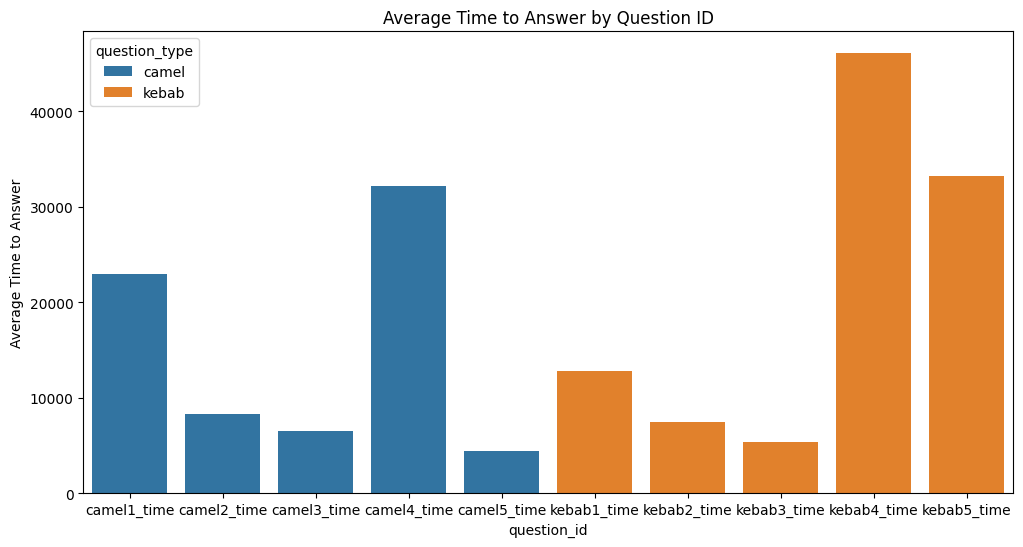

In [19]:
# Melt the DataFrame to create separate columns for question_id and time
melted_df = pd.melt(df, id_vars=['participantID', 'experience'], var_name='question_id', value_name='value')

# Separate question type and number
melted_df[['question_type', 'question_number']] = melted_df['question_id'].str.extract('([a-zA-Z]+)(\d+)', expand=True)

# Convert question_number to numeric
melted_df['question_number'] = pd.to_numeric(melted_df['question_number'])

# List of columns to exclude
exclude_columns = ['camel1_score', 'camel2_score', 'camel3_score', 'camel4_score', 'camel5_score',
                   'kebab1_score', 'kebab2_score', 'kebab3_score', 'kebab4_score', 'kebab5_score',
                   'camel_average', 'kebab_average']

# Filter columns to include only time-related columns
time_df = melted_df[melted_df['question_type'].isin(['camel', 'kebab']) & ~melted_df['question_id'].isin(exclude_columns)]

# Plot: Average time to answer questions vs. question id
plt.figure(figsize=(12, 6))
sns.barplot(x='question_id', y='value', data=time_df, hue='question_type', errorbar=None)
plt.title('Average Time to Answer by Question ID')
plt.ylabel('Average Time to Answer')
plt.show()

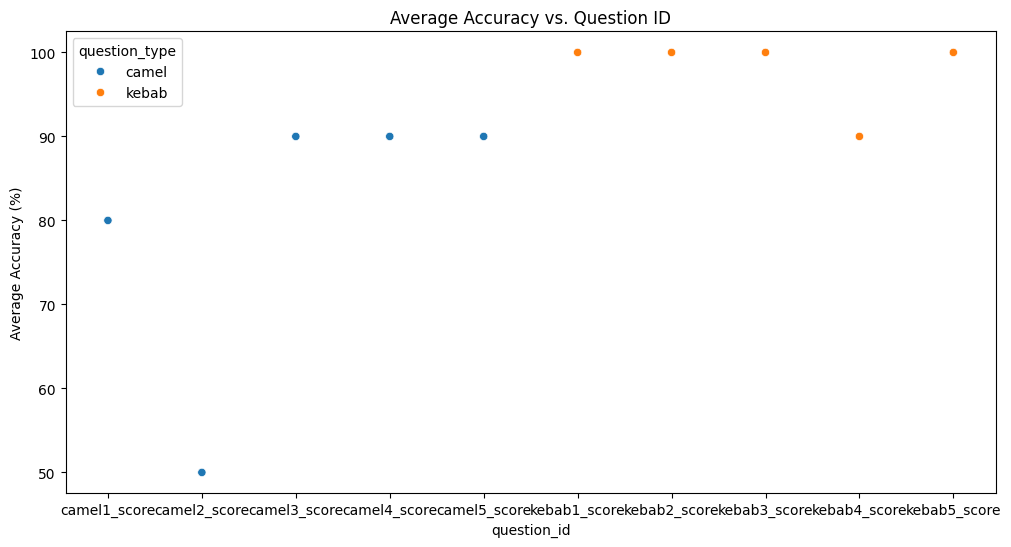

In [30]:
# Melt the DataFrame to create separate columns for question_id and time
melted_df = pd.melt(df, id_vars=['participantID', 'experience'], var_name='question_id', value_name='value')

# Separate question type and number
melted_df[['question_type', 'question_id_number']] = melted_df['question_id'].str.extract('([a-zA-Z]+)(\d+)', expand=True)

# Convert question_id_number to numeric
melted_df['question_id_number'] = pd.to_numeric(melted_df['question_id_number'], errors='coerce')

# Filter columns to include only score-related columns
score_df = melted_df[melted_df['question_id'].str.contains('_score')]

# Group by question_id and calculate the average accuracy as a percentage
avg_accuracy_df = score_df.groupby(['question_type', 'question_id'])['value'].mean() * 100
avg_accuracy_df = avg_accuracy_df.reset_index()

# Sort columns in ascending order
avg_accuracy_df = avg_accuracy_df.sort_values(by=['question_id'])

# Plot: Average Accuracy vs. question id
plt.figure(figsize=(12, 6))
sns.scatterplot(x='question_id', y='value', data=avg_accuracy_df, hue='question_type')
plt.title('Average Accuracy vs. Question ID')
plt.ylabel('Average Accuracy (%)')
plt.show()

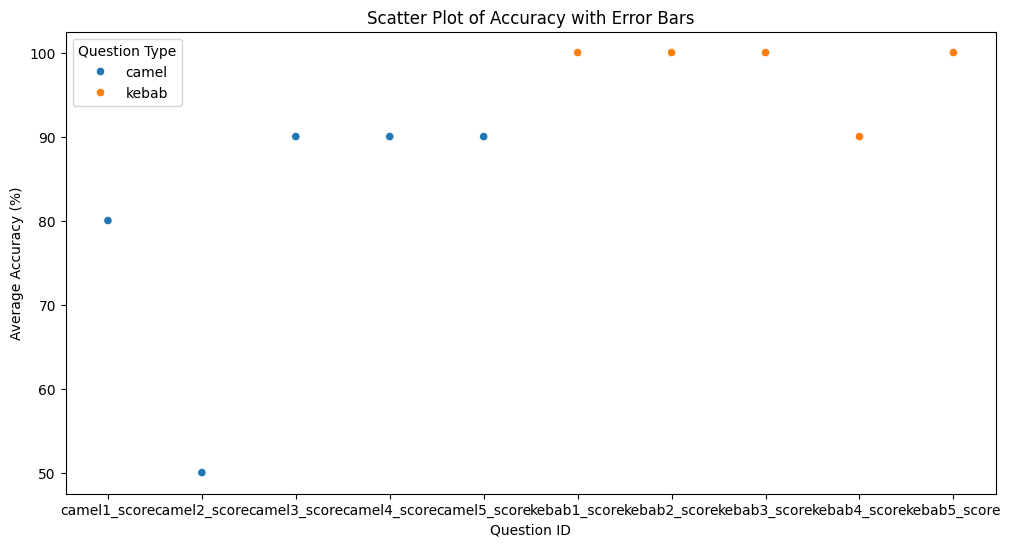

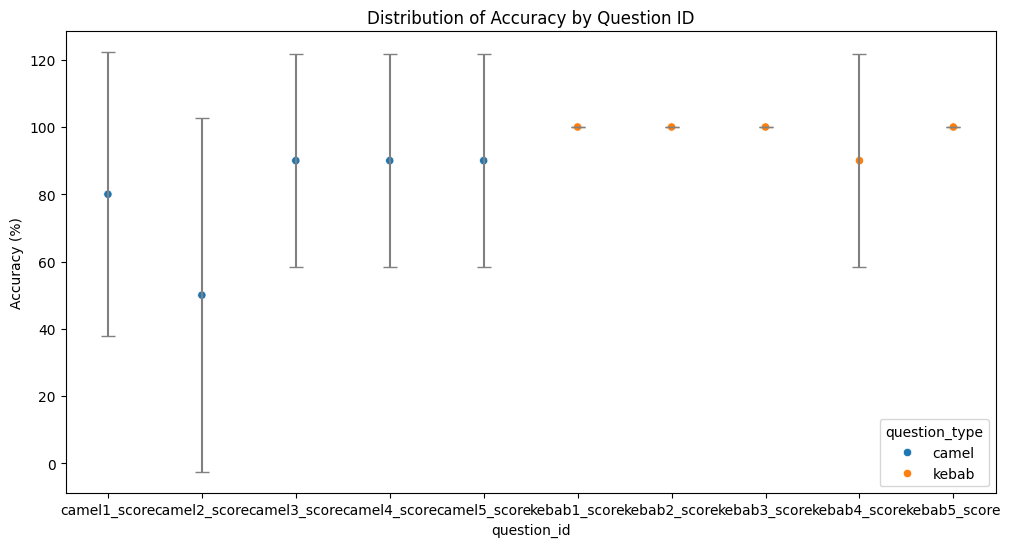

In [42]:
# Melt the DataFrame to create separate columns for question_id and time
melted_df = pd.melt(df, id_vars=['participantID', 'experience'], var_name='question_id', value_name='value')

# Separate question type and number
melted_df[['question_type', 'question_id_number']] = melted_df['question_id'].str.extract('([a-zA-Z]+)(\d+)', expand=True)

# Convert question_id_number to numeric
melted_df['question_id_number'] = pd.to_numeric(melted_df['question_id_number'], errors='coerce')

# Filter columns to include only score-related columns
score_df = melted_df[melted_df['question_id'].str.contains('_score')]

# Group by question_id and calculate the average accuracy as a percentage with standard deviation
avg_accuracy_df = score_df.groupby(['question_type', 'question_id'])['value'].agg(['mean', 'std']) * 100
avg_accuracy_df = avg_accuracy_df.reset_index()

# Sort columns in ascending order
avg_accuracy_df = avg_accuracy_df.sort_values(by=['question_id'])

# Plot: Scatter Plot with Error Bars
plt.figure(figsize=(12, 6))
sns.scatterplot(x='question_id', y='mean', data=avg_accuracy_df, hue='question_type')
# plt.errorbar(x=avg_accuracy_df['question_id'], y=avg_accuracy_df['mean'], yerr=avg_accuracy_df['std'], fmt='none', color='black', capsize=3)
plt.title('Scatter Plot of Accuracy with Error Bars')
plt.xlabel('Question ID')
plt.ylabel('Average Accuracy (%)')
plt.legend(title='Question Type')
plt.show()


# Scatter Plot with Error Bars and a Smaller CI (68%)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='question_id', y='mean', data=avg_accuracy_df, hue='question_type', marker='o')

# Calculate lower and upper bounds for error bars (68% CI)
lower_bound = avg_accuracy_df['mean'] - avg_accuracy_df['std']
upper_bound = avg_accuracy_df['mean'] + avg_accuracy_df['std']

# Draw error bars
plt.errorbar(x=avg_accuracy_df['question_id'], y=avg_accuracy_df['mean'], yerr=[avg_accuracy_df['mean'] - lower_bound, upper_bound - avg_accuracy_df['mean']], fmt='none', color='gray', capsize=5)

plt.title('Distribution of Accuracy by Question ID')
plt.ylabel('Accuracy (%)')
plt.show()

/tmp/ipykernel_228708/1390051783.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='question_type', y='mean', data=overall_avg_accuracy_df, ci=None)


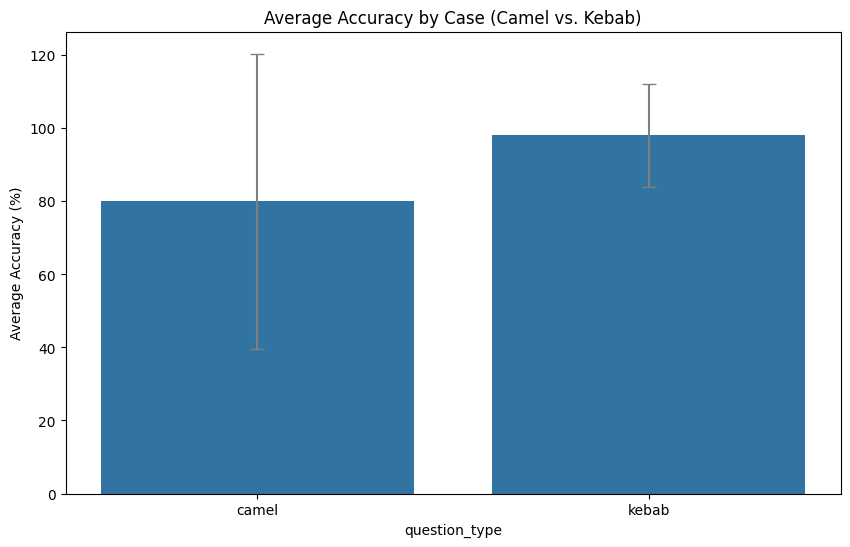

In [44]:
# Filter columns to include only score-related columns
accuracy_columns = [col for col in df.columns if '_score' in col]

# Melt the DataFrame to create separate columns for question_id and accuracy
accuracy_melted_df = pd.melt(df, id_vars=['participantID', 'experience'], value_vars=accuracy_columns, 
                             var_name='question_id', value_name='accuracy')

# Separate question type and number
accuracy_melted_df[['question_type', 'question_id_number']] = accuracy_melted_df['question_id'].str.extract('([a-zA-Z]+)(\d+)', expand=True)

# Convert question_id_number to numeric
accuracy_melted_df['question_id_number'] = pd.to_numeric(accuracy_melted_df['question_id_number'], errors='coerce')

# Group by question_type and calculate the overall average accuracy as a percentage with standard deviation
overall_avg_accuracy_df = accuracy_melted_df.groupby('question_type')['accuracy'].agg(['mean', 'std']) * 100
overall_avg_accuracy_df = overall_avg_accuracy_df.reset_index()

# Plot: Two-column average accuracy by case vs. case
plt.figure(figsize=(10, 6))
sns.barplot(x='question_type', y='mean', data=overall_avg_accuracy_df, ci=None)
plt.errorbar(x=overall_avg_accuracy_df['question_type'], y=overall_avg_accuracy_df['mean'],
             yerr=overall_avg_accuracy_df['std'], fmt='none', color='gray', capsize=5)

plt.title('Average Accuracy by Case (Camel vs. Kebab)')
plt.ylabel('Average Accuracy (%)')
plt.show()

Grouped DataFrame:
                          participantID     experience  camel1_score  \
0  0562b141-dce2-4f1e-a240-12803e1dd959  no-experience           1.0   
1  1f29dc05-6e9c-4eeb-b637-f656f0359709     more-three           0.0   
2  24e6c294-32f9-47ef-9ea9-2335341f1259   bachelor-inf           1.0   
3  8792e96d-68e7-4e0a-a5eb-4a0bb85f31d2     more-three           1.0   
4  93de7372-685b-40c4-84e9-01fd740a21b8     more-three           1.0   

   camel2_score  camel3_score  camel4_score  camel5_score  kebab1_score  \
0           0.0           0.0           1.0           1.0           1.0   
1           0.0           1.0           1.0           1.0           1.0   
2           0.0           1.0           1.0           1.0           1.0   
3           1.0           1.0           1.0           1.0           1.0   
4           1.0           1.0           1.0           1.0           1.0   

   kebab2_score  kebab3_score  kebab4_score  kebab5_score  mean_duration  \
0           1.0      

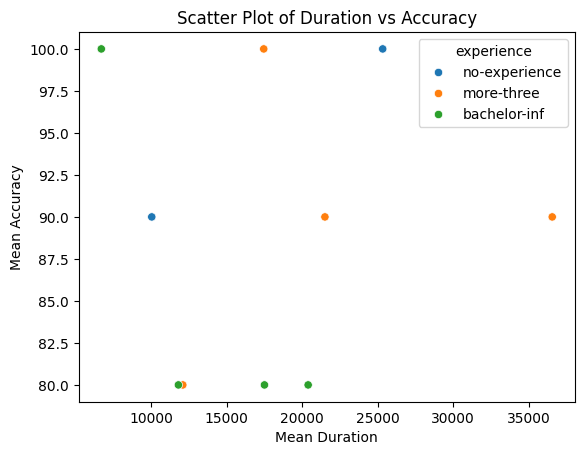

In [87]:
# Assuming your DataFrame is named 'df'

# Filter columns to include only score-related columns
score_columns = [col for col in df.columns if '_score' in col]

# Group by participant and experience, calculate mean duration and accuracy
grouped_df = df.groupby(['participantID', 'experience'])[score_columns].mean()

# Reset the index to make participantID and experience regular columns
grouped_df = grouped_df.reset_index()

# Calculate mean duration and accuracy for each participant
duration_columns = [col for col in df.columns if '_time' in col]
accuracy_columns = [col for col in df.columns if '_score' in col]

grouped_df['mean_duration'] = df[duration_columns].mean(axis=1)
grouped_df['mean_accuracy'] = df[accuracy_columns].mean(axis=1) * 100

# Print the grouped DataFrame to check the result
print("Grouped DataFrame:")
print(grouped_df.head())

# Create a scatter plot
sns.scatterplot(x='mean_duration', y='mean_accuracy', hue='experience', data=grouped_df)
plt.title('Scatter Plot of Duration vs Accuracy')
plt.xlabel('Mean Duration')
plt.ylabel('Mean Accuracy')
plt.show()